# Single neuron dynamics

In [1]:
# fileName

fileName = 'eg_single-clique' 

In [2]:
# libs

try:
    import pyNN.spiNNaker as sim
except ModuleNotFoundError:
    import pyNN.brian2 as sim
    
from pyNN import space 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle
import pandas as pd
import seaborn as sns
import time

INFO       Cache size for target 'cython': 1175478576 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the '/home/bbpnrsoa/.cython/brian_extensions' directory. [brian2]


In [3]:
# simulation settings

sim.setup(
        timestep=1, # [ms]
        min_delay=1, # [ms]
        max_delay=100) # [ms]

simtime = 100 #ms

In [4]:
# define the network

cell0 = sim.Population(1, 
                      sim.IF_cond_exp(), 
                      label='cell0')
cell1 = sim.Population(1, 
                      sim.IF_cond_exp(), 
                      label='cell1')

cell0.record(['v', 'gsyn_exc', 'gsyn_inh', 'spikes'])
cell1.record(['v', 'gsyn_exc', 'gsyn_inh', 'spikes'])

print(sim.IF_cond_exp.default_parameters)

{'v_rest': -65.0, 'cm': 1.0, 'tau_m': 20.0, 'tau_refrac': 0.1, 'tau_syn_E': 5.0, 'tau_syn_I': 5.0, 'e_rev_E': 0.0, 'e_rev_I': -70.0, 'v_thresh': -50.0, 'v_reset': -65.0, 'i_offset': 0.0}


In [5]:
# define connections

ge=1 #uS
gi=1 #uS
d=1 # delay ms

#spike_source = sim.Population(1, sim.SpikeSourceArray(spike_times=[200, 201, 202]))
connection = sim.Projection(cell0, cell1,
                            sim.OneToOneConnector(),
                            sim.StaticSynapse(weight=ge, delay=d),
                            receptor_type='excitatory'),

connection = sim.Projection(cell1, cell0,
                            sim.OneToOneConnector(),
                            sim.StaticSynapse(weight=gi, delay=d),
                            receptor_type='inhibitory'),


In [6]:
# input

#pulse = sim.DCSource(amplitude=1, start=20.0, stop=30.0)
pulse = sim.StepCurrentSource(times=[30,40],
                          amplitudes=[10,0,])
pulse.inject_into(cell0)
pulse.record()


In [7]:
# simulation run

tic = time.time()
sim.run(simtime)
toc = time.time() - tic
print(f'simulation time: {toc} [s]')

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.02s, trying other methods took 0.08s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, trying other methods took 0.03s). [brian2.stateupdaters.base.method_choice]


simulation time: 0.315532922744751 [s]


In [8]:
# results

v0=cell0.get_data(variables=['v']).segments[0].analogsignals[0]
v1=cell1.get_data(variables=['v']).segments[0].analogsignals[0]
ge0=cell0.get_data(variables=['gsyn_exc']).segments[0].analogsignals[0]
gi0=cell0.get_data(variables=['gsyn_inh']).segments[0].analogsignals[0]
ge1=cell1.get_data(variables=['gsyn_exc']).segments[0].analogsignals[0]
gi1=cell1.get_data(variables=['gsyn_inh']).segments[0].analogsignals[0]
spikes0=cell0.get_data(variables=['spikes']).segments[0].spiketrains[0]
spikes1=cell1.get_data(variables=['spikes']).segments[0].spiketrains[0]

i=pulse.get_data()

print(f'cell0 spikes: {cell0.get_spike_counts()}')
print(f'cell1 spikes: {cell1.get_spike_counts()}')

cell0 spikes: {0: 32}
cell1 spikes: {1: 67}


WARNING    /home/bbpnrsoa/.local/lib/python3.8/site-packages/neo/core/basesignal.py:122: RuntimeWarning: invalid value encountered in true_divide
  new_signal = f(other, *args)
 [py.warnings]


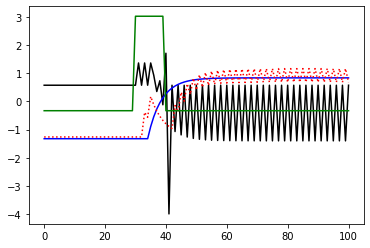

In [9]:
plt.plot((v0-np.mean(v0))/np.std(v0), 'k')
plt.plot((ge0-np.mean(ge0))/np.std(ge0), 'r')
plt.plot((gi0-np.mean(gi0))/np.std(gi0), 'b')
plt.plot((v1-np.mean(v1))/np.std(v1), ':k')
plt.plot((ge1-np.mean(ge1))/np.std(ge1), ':r')
plt.plot((gi1-np.mean(gi1))/np.std(gi1), ':b')
plt.plot((i-np.mean(i))/np.std(i), 'g')

